# Sparse Sheaf Signal Processing

### TO-DO

**Input**: point cloud in R^3
1. Build a graph from the points using KNN: connect a point with its k nearest neighbors (OK)
2. Approximate an orthonormal basis for every tangent vector bundle with PCA

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.neighbors import NearestNeighbors

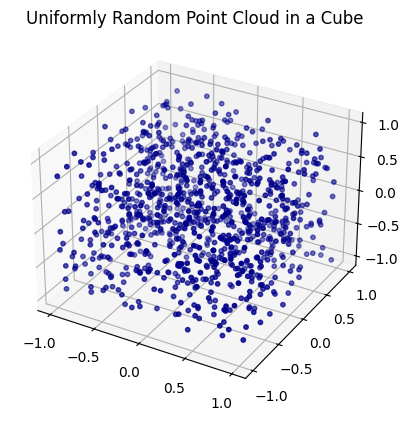

In [58]:
# Generate a cube in R^3 with uniformly random points
N = 1000 # number of points in the cloud
np.random.seed(6111983)
x = np.random.uniform(-1,1,N*3).reshape((N, 3)) # points
# Plot the cube
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], marker='o', s=10, c='darkblue')
plt.title('Uniformly Random Point Cloud in a Cube')
plt.show()

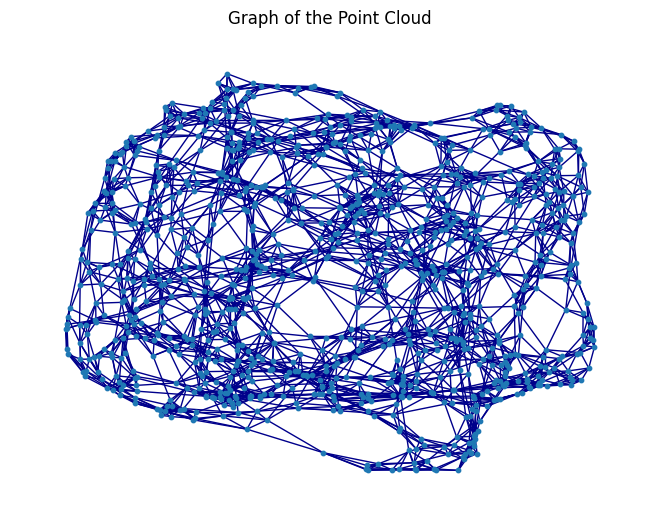

In [36]:
# Build a graph from the point cloud
k = 7 # number of nearest neighbors
G = nx.Graph()
G.add_nodes_from(range(N))
knn = NearestNeighbors(n_neighbors=k+1, algorithm='auto')
distances, indices = knn.fit(x).kneighbors(x)
for i in range(N):
    for j in range(1,k): # exclude self-loops
        G.add_edge(i, indices[i][j], weight=1/distances[i][j])
# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False,node_size=10,edge_color='darkblue')
plt.title('Graph of the Point Cloud')
plt.show()

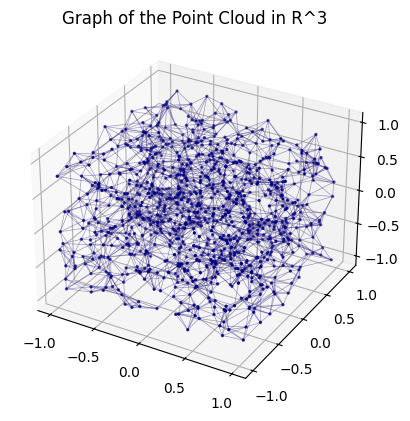

In [57]:
# Plot the cube
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], marker='o', s=2, c='navy')
# Plot the edges
for edge in G.edges():
    x1, y1, z1 = x[edge[0]]
    x2, y2, z2 = x[edge[1]]
    ax.plot([x1, x2], [y1, y2], [z1, z2], c='darkslateblue', linewidth=0.5, alpha=0.5)
plt.title('Graph of the Point Cloud in R^3')
plt.show()